### Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.shape

(21, 2)

In [7]:
df.count()

Delivery Time    21
Sorting Time     21
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
df.isnull().values.any()

False

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

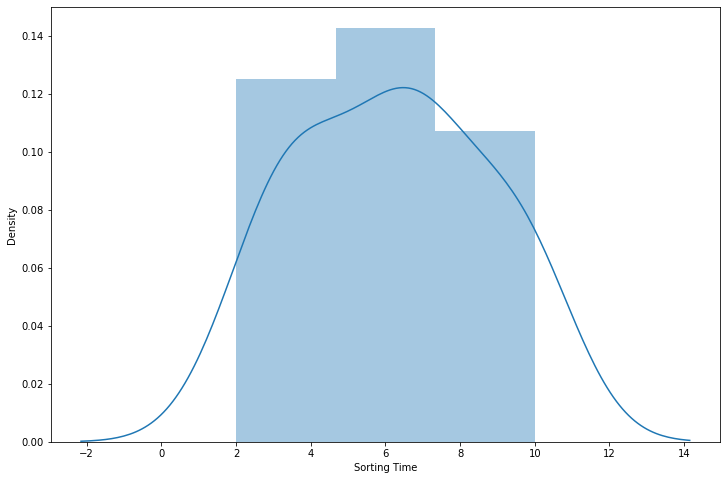

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['Sorting Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

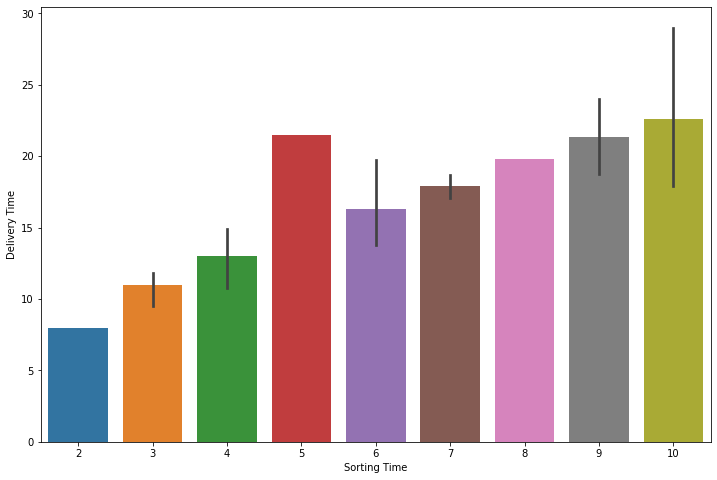

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x="Sorting Time",y="Delivery Time",data=df)

<AxesSubplot:xlabel='Delivery Time'>

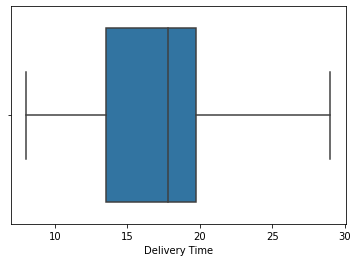

In [12]:
sns.boxplot(df['Delivery Time'])

In [13]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [14]:
df=df.rename(columns={'Delivery Time':'dt','Sorting Time':'st'})

In [15]:
df

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='st', ylabel='Density'>

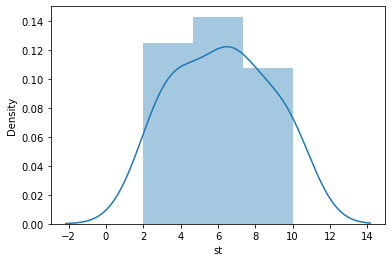

In [17]:
sns.distplot(df['st'])

<AxesSubplot:xlabel='dt', ylabel='Density'>

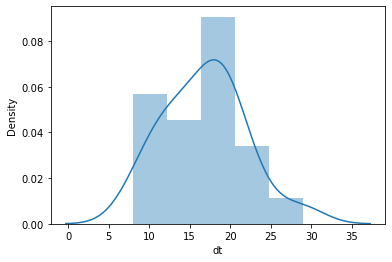

In [18]:
sns.distplot(df['dt'])

<AxesSubplot:xlabel='st', ylabel='dt'>

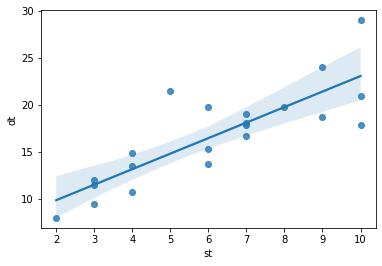

In [19]:
sns.regplot(x=df['st'],y=df['dt'])

In [20]:
import statsmodels.formula.api as smf
model=smf.ols("dt~st",data=df).fit()

In [21]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        08:21:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [24]:
pred=model.predict(df.st)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [25]:
 model.resid_pearson 

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

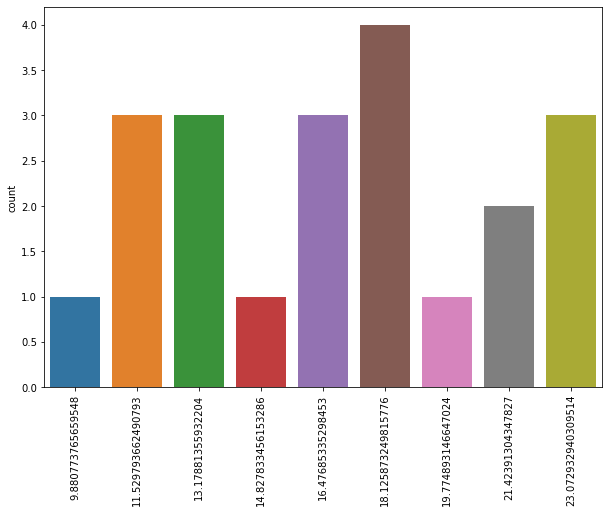

In [26]:
plt.figure(figsize=(10,7))
sns.countplot(pred)
plt.xticks(rotation=90)
plt.show()

### Transformations

In [ ]:
# Log transformation
model_log=smf.ols("dt~np.log(st)",data=df).fit()
pred_log=model_log.predict(df.st)
rmse_log=np.sqrt(np.mean((df.dt-pred_log)**2))

In [ ]:
# Square transformation
model_sq= smf.ols("dt ~ st**2",data=df).fit()
pred_sq= model_sq.predict(df.st)
rmse_sq=np.sqrt(np.mean((df.dt-pred_sq)**2))

In [28]:
# Square root transformation
model_sqrt=smf.ols("dt ~ np.sqrt(st)",data=df).fit()
pred_sqrt=model_sqrt.predict(df.st)
rmse_sqrt=np.sqrt(np.mean((df.dt-pred_sqrt)**2))

In [27]:
print("RMSE for log transformation:", rmse_log)
print("RMSE for square transformation:", rmse_sq)
print("RMSE for square root transformation:", rmse_sqrt)

RMSE for log transformation: 2.733171476682066
RMSE for square transformation: 2.7916503270617654
RMSE for square root transformation: 2.7315432100912105
